# Primer: Padanja kapi kiše

Ovaj primer pokazuje kako možemo pronaći kretanje objekta koji je podložan konstantnoj sili (gravitacije) i otporu vazduha koji zavisi od brzine kretanja. Kapi kiše su često male, prečnika oko $d = 1mm$ kada počnu da padaju. Ovde primenjujemo strukturirani metod rešavanja problema da bismo pronašli njihovu brzinu, prvo bez otpora vazduha, a zatim koristeći model viskoznog otpora.
Skica i identifikacija: Uvek započinjemo rešavanje problema crtanjem skice koja uključuje sistem (kap kiše), okruženje i koordinatni sistem. Položaj kapi opisujemo njenom vertikalnom pozicijom y(t) u funkciji vremena t.

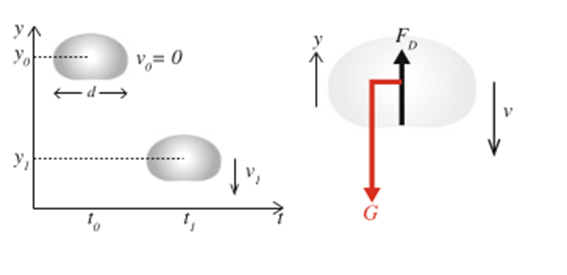

Model:
Kretanje kapi kiše određeno je silama koje deluju na nju. Prikazujemo sile dijagramom slobodnog tela, kao što je prikazano na prethodnoj slici. Skica prikazuje da je kap u kontaktu samo sa okolnim vazduhom, koji stvara silu otpora $F_D$. Pored toga, na kap deluje sila gravitacije $ G $.
Znamo da je gravitacija $ G = -mgj $, gde je $ m $ masa kapi, $g$ gravitaciono ubrzanje $[9.81 \:m/s^2]$ i $ j $ vektor pravca. Za silu otpora $F_D$ pretpostavljamo da važi zakon o viskoznosti: $F_D = -k_v v(t)j$, gde je $v(t)$ brzina kapi. 

Želimo da prikažemo promenu brzine kretanja kapi, da bismo to uradili potrebno nam je ubrzanje do kog dolazimo primenom drugog Njutnovog zakona na silu $F_{net} = F_D + G = -mgj - k_vv(t)j = maj$  
Iz prethodne formule dobijamo : $- mg - k_vv(t) = ma$  

Nedostaju nam dve veličine u ovoj jednačini: $m$ i $k_v$. 
Da bismo izračunali masu kapi vode pretpostavićemo da je oblik sfera, i izračunati masu kao proizvod $ m = Vρ $, gde je $V = (\frac{4\pi}{3})r^3$ zapremina kapi, a $ρ = 1000.0 kg/m^3$ gustina vode. 
Koeficijent otpora $k_v$ dobijamo iz Stoksove formule: $k_v = 6\piηr$, gde je poluprečnik kapi je $r = d/2 m$, a viskoznost vazduha je $η = 1.82 × 10⁻⁵ N·s/m²$.

Ovo je program koj prikazuje promenu $m$ mase i $k_v$ koeficijenta otpora u odnosu na veličinu kapljice.

Unesite precnik kapi(mm):  1


za precnik d = 0.001 dobijamo 
masu m = 5.235988e-07 i koeficijent otpora kv = 1.715310e-07



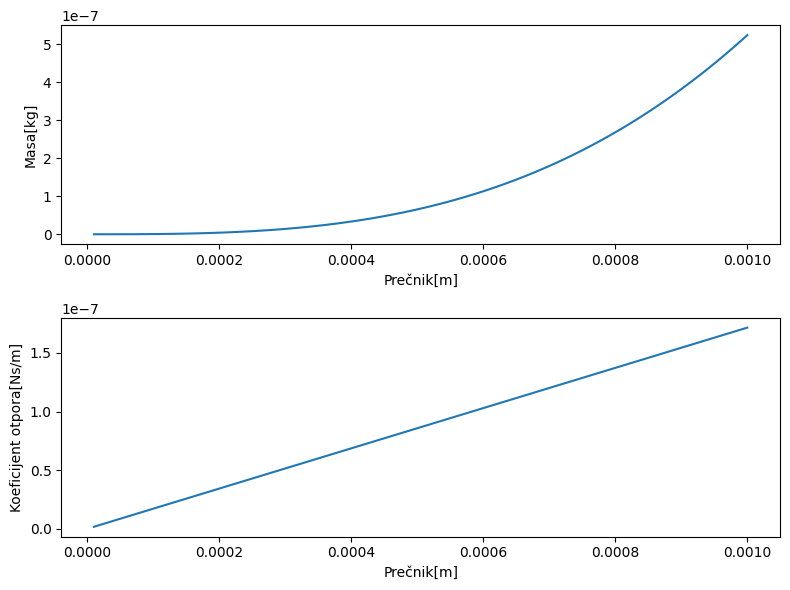

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

ro = 1000.0 #kg/m^3
ni = 1.82e-5 #Ns/m^2
#inputs
d = float(input("Unesite precnik kapi(mm): ")) / 1000
#variables
mass = np.zeros(100, float)
kv = np.zeros(100, float)
R = np.zeros(100, float)

R[0] = d/100
for i in range(100 - 1):
    mass[i] = (4*math.pi/3)*((R[i]/2) ** 3) * ro
    kv[i] = 6*math.pi*ni*(R[i]/2)
    R[i + 1] = R[i] + d/100
    
mass[-1] = (4*math.pi/3)*((R[-1]/2) ** 3) * ro
kv[-1] = 6*math.pi*ni*(R[-1]/2)
print(f"za precnik d = {round(R[-1],3)} dobijamo \nmasu m = {mass[-1]:e} i koeficijent otpora kv = {kv[-1]:e}\n")

fig, axs = plt.subplots(2, 1, figsize=(8,6))

axs[0].plot(R, mass)
axs[0].set_xlabel("Prečnik[m]")
axs[0].set_ylabel("Masa[kg]")

axs[1].plot(R, kv)
axs[1].set_xlabel("Prečnik[m]")
axs[1].set_ylabel("Koeficijent otpora[Ns/m]")

plt.tight_layout()
plt.show()

Kako bismo izračunali kretanje kapi, potrebno je da pogledamo ponašanje kapi tokom pada, na početnom polozaju $y(0) = h$ u trenutku $t = 0$ nalazi se u stanju mirovanja, tj. $v(0) = 0 m/s$.

### Pojednostavljen model: Bez otpora vazduha:

Šta se dešava u pojednostavljenom slučaju kada nema otpora vazduha? Tada je $k_v = 0$, i ubrzanje je konstanta: $a = -g$   
Brzinu nalazimo kao funkciju vremena direktnom integracijom: $v(t) – v(0) = \int_{0}^{t} a dt = -gt$
Ovo odgovara slobodnom padu, kao što smo već videli. Očekujemo da je ovo dobra aproksimacija sve dok je sila otpora mala,
tj. sve dok je $k_vv(t)$ mnogo manji od $mg$.

Ako uzmemo prečnik $d = 1\times10^{-3}$ metara, dobijamo da su masa $m = 5.24\times10^{-7}$ i koeficijent otpora $k_v = 1.72\times10^{-7}$.
Pa se brzina, sve dok je $k_v v ≪ mg$, bila $ v ≪ \frac{mg}{k_v} = 27.8 m/s $. Kasnije ćemo videti koliko je ova aproksimacija dobra.

### Pojednostavljen model: Sa otporom vazduha
kako je početna brzina $v(0) = 0$ početno ubrzanje $a = -g - (\frac{k_v}{m})v = -g$. Kako kap pada, brzina postaje negativna i sve veća po apsolutnoj vrednosti. 
Ubrzanje $a = -g - (\frac{k_v}{m})v$ će se smanjivati. Kada ubrzanje postane nula, brzina se više neće menjati, i kap će dostići stacionarnu brzinu — brzinu koja se više ne menja s vremenom. 
Ovo se dešava kada $a = -g - \frac{k_v}{m} = 0 ⇒ -g = \frac{k_v}{m} ⇒ v = - \frac{mg}{k_v}$. Ovu brzinu nazivamo terminalna brzina: $v_T = \frac{mg}{k_v}$  
Dakle, očekujemo da kap postepeno prilazi brzini $v = -v_T$ kako vreme raste.



### Potpuni model: Numeričko rešenje:

Znamo početno ponašanje $a = -g$ i krajnje ponašanje $a → 0 \; m/s²$, $v → -v_T$.
Ubrzanje nalazimo rešenjem: $$a = \frac{dv}{dt} = -g - (\frac{k_v}{m})v$$  


Početni uslovi za brzinu su $v(t₀) = 0 \; m/s$ i primenjuje se Ojlerova metoda: 

$$v(tᵢ + Δt) = v(tᵢ) + Δt · a(tᵢ, v(tᵢ))$$   

#### Ovde imamo program koj ilustruje grafove promene brzine i ubrzanja kroz vreme:

Input diameter of raindrop:  1
Input the time:  20


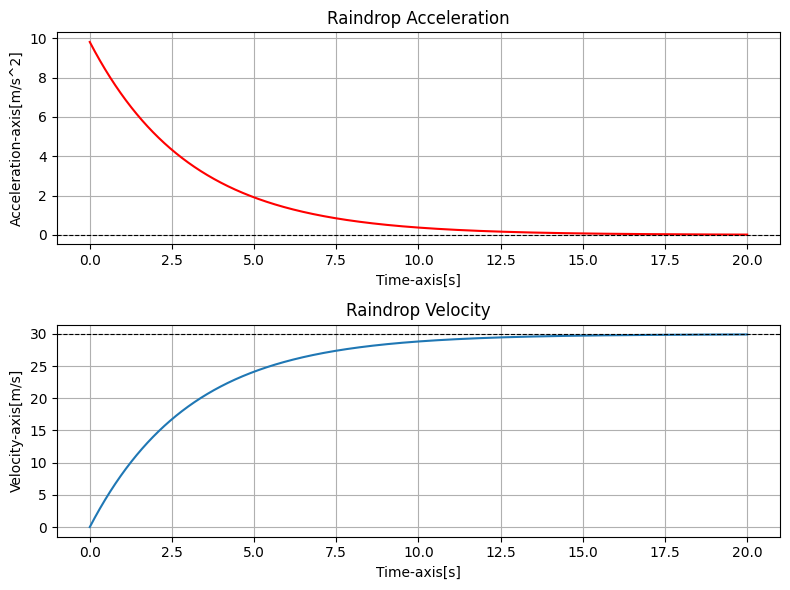

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

#simulating raindrop velocity change
#Formulas
#V = 4pi/3 * r^3
#G = -m*g where g = 9.81 m/s^2
#Fd = -kv*v(t) - air resistance
#a = -g -kv/m * v
#v(t + dt) = v(t) + dt*a(t, v(t))

#const
g = 9.81 # m/s^2
ni = 1.82e-5    # Ns/m^2
water_density = 1000 # kg/m^3
dt = 0.001

#inputs
diameter = float(input("Input diameter of raindrop: ")) # milimetres
time = int(input("Input the time: "))

#variables
r = (diameter/2)/1000 # diameter/2 put into metres
mass = 4/3 * math.pi * (r ** 3) * water_density # kg
kv = 6*math.pi*r*ni
n = int(round(time/dt))
vt = mass*g/kv

#arrays
t = np.zeros(n, float)
v = np.zeros(n, float)
a = np.zeros(n, float)

#simulation
for i in range(n-1):
    a[i] = g - (kv/mass)*v[i]
    v[i+1] = v[i] + dt*(a[i])
    t[i+1] = t[i] + dt
a[n-1] = g - (kv/mass)*v[n-1]

fig, axs = plt.subplots(2, 1, figsize=(8,6)) # figsize adjusts the figure size

#Plot on the second subplot (axs[0])
axs[0].plot(t, a, color='red')
axs[0].grid()
axs[0].axhline(y = a[-1], color = 'black', linestyle = '--', lw = 0.8)
axs[0].set_title('Raindrop Acceleration')
axs[0].set_xlabel('Time-axis[s]')
axs[0].set_ylabel('Acceleration-axis[m/s^2]')

#Plot on the first subplot (axs[1])
axs[1].plot(t, v)
axs[1].grid()
axs[1].axhline(y = v[-1], color = 'black', linestyle = '--', lw = 0.8)
axs[1].set_title('Raindrop Velocity')
axs[1].set_xlabel('Time-axis[s]')
axs[1].set_ylabel('Velocity-axis[m/s]')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


### Analitičko rešenje – simbolički pristup

Imamo sreće jer se jednačina  može rešiti analitički korišćenjem razdvajanja promenljivih.
Jednačina se pojednostavljuje kao: $$d\frac{dv}{dt} = -g - \frac{k_v}{m}v = -g - \frac{g}{v_T}v = -g (1 + \frac{v}{v_T})$$      
<br>
Početni uslov je $v(0) = 0 \;m/s$. Razdvajamo $v$ i $t$ sa obe strane jednačine:$\frac{dv}{(1 + v/v_T)} = -gdt$ Integralimo sa obe strane od $t₀ = 0$ do $t$:
$$-\int_{0}^{t}(gdt) = \int_{0}^{v(t)} \frac{dv}{1+ \frac{v}{v_T}}$$      
<br>
Radimo smenu po $u = 1 + \frac{v}{v_T},~~ du = \frac{dv}{v_T},~~ dv = v_Tdu$, pa dobijamo:

$$\int_{1}^{u}\frac{du}{u} = -g(t - 0) ⇒ v_T \ln(1 + \frac{v}{v_T}) = -gt$$      
<br>
$$\ln(1 + \frac{v}{v_T}) = -\frac{gt}{v_T}  ⇒ 1 + \frac{v}{v_T} = e^(-\frac{gt}{v_T}) ⇒ v(t) = v_T (e^{-\frac{gt}{v_T}} – 1)$$     



In [4]:
from sympy import *
from sympy.abc import t
from sympy.abc import g
from sympy.abc import u

v = Function('v')
dsolve(Derivative(v(t),t)+g+g/u*v(t),v(t))

Eq(v(t), C1*exp(-g*t/u) - u)

Što odgovara $v(t) = v(t) = v_T (e^{-\frac{gt}{v_T}} – 1)$